In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import braingeneers
from braingeneers.analysis.analysis import SpikeData, read_phy_files
import braingeneers.data.datasets_electrophysiology as ephys
import scipy.io as sio
import scipy
from scipy.ndimage import gaussian_filter1d
import glob
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import random

In [2]:
sd = read_phy_files('/home/jovyan/work/Experiment/data/ephys/2023-04-02-hc328_rec/derived/kilosort2/2023_04_02_hc328_5_curated.zip')

In [3]:
sd.N

72

In [11]:
## 14,19,27,34, 36
neuron1 = 34
neuron2 = 36

Mean Latency:  -2.4708333333349706
Number of Latencies:  12


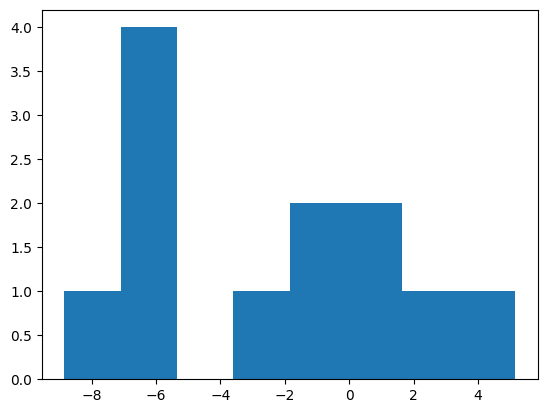

In [12]:
lates_n1 = sd.latencies_to_index(neuron1)
lates_raw = lates_n1[neuron2]
lates =  list(filter(lambda x: x < 10 and x > -10, lates_raw ))
plt.hist(lates,bins=8)
#plt.xlim([-25,25])
# print("Mean Latency: ", np.mean(lates) )
# print("Number of Latencies: ", len(lates))
plt.show()

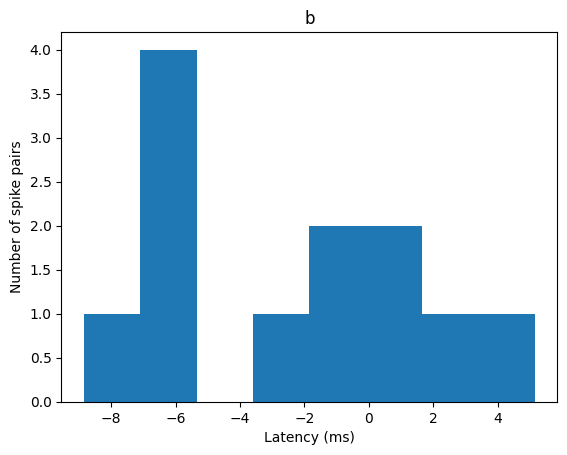

In [14]:
import matplotlib.pyplot as plt
import numpy as np

lates_n1 = sd.latencies_to_index(neuron1)
lates_raw = lates_n1[neuron2]
lates = list(filter(lambda x: x < 10 and x > -10, lates_raw))

plt.hist(lates, bins=8)

plt.xlabel("Latency (ms)")
plt.ylabel("Number of spike pairs")
plt.title("b")

# Uncomment the following lines if you want to set custom x-axis limits
# plt.xlim([-25, 25])

# Uncomment the following lines if you want to print mean latency and number of latencies
# print("Mean Latency:", np.mean(lates))
# print("Number of Latencies:", len(lates))
plt.savefig('/home/jovyan/work/Experiment/Thomas/Plot_B.png')
plt.show()

In [15]:
def latencyPlots(neuron1, neuron2):
    
    # Create plot of neural units with selected neurons for latency calculation in green
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)

    neuron_x = []
    neuron_y = []
    neuron_amp = []
    for neuron in sd.neuron_data[0].values():
    #     print("x,y:",neuron['position'])
        neuron_x.append(neuron['position'][0])

        neuron_y.append(neuron['position'][1])
        neuron_amp.append(np.mean(neuron['amplitudes']))

    plt.scatter(neuron_x,neuron_y,s=neuron_amp,c='r')
    plt.scatter(neuron_x,neuron_y,s=neuron_amp,c='r')

    plt.scatter([neuron_x[neuron1]],[neuron_y[neuron1]],s=70,c='g')
    plt.scatter([neuron_x[neuron2]],[neuron_y[neuron2]],s=70,c='g')

    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("electrode layout")
    #plt.show()
    
    # Plot Histogram of latencies
    plt.subplot(1, 2, 2)
    lates_n1 = sd.latencies_to_index(neuron1)
    lates_raw = lates_n1[neuron2]
    lates =  list(filter(lambda x: x < 10 and x > -10, lates_raw ))
    plt.hist(lates,bins=8)
    #plt.xlim([-25,25])
    print("Mean Latency: ", np.mean(lates) )
    print("Number of Latencies: ", len(lates))
    plt.show()

In [9]:
interact_manual( latencyPlots,  neuron1=(0,72), neuron2=(0,72) )

interactive(children=(IntSlider(value=36, description='neuron1', max=72), IntSlider(value=36, description='neu…

<function __main__.latencyPlots(neuron1, neuron2)>